# ตอนที่ 1: การทดลองเตรียมข้อมูลและแสดงรายละเอียดข้อมูลเชิงกราฟ

1.1 Import Lib (numpy, pandas, matplotlib, sklearn, datetime)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import preprocessing
import seaborn as sns
import datetime as dt
from collections import defaultdict

1.2 โหลดข้อมูล MovieLens Dataset file (‘ratings.csv’, ‘movies.csv’, ‘tags.csv’) โดยใช้

In [2]:
data_rating = pd.read_csv('ml-latest-small/ratings.csv')
data_movies = pd.read_csv('ml-latest-small/movies.csv')
data_tags = pd.read_csv('ml-latest-small/tags.csv')
data = [data_rating,data_movies,data_tags]

In [3]:
def set_date(data):
    data['Date'] = pd.to_datetime(data['timestamp'],unit='s')
#     data.sort_values('Date', inplace=True)
set_date(data_rating)
set_date(data_tags)

In [4]:
print("size : ",len(data_rating))
data_rating.head()

size :  100836


,userId,movieId,rating,timestamp,Date
0,1,1,4.0,964982703,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51


In [5]:
print("size : ",len(data_movies))
data_movies.head()

size :  9742


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:

data_movies['year'] = data_movies['title'].str.split(" ")
data_movies['year'] = data_movies['year'].str[-1]
data_movies['year'] = data_movies['year'].str[-5:-1]
data_movies = data_movies[data_movies['year'].str.isdigit()].dropna()
data_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [7]:
print("size : ",len(data_tags))
data_tags.head()

size :  3683


,userId,movieId,tag,timestamp,Date
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


1.3 Data Preprocessing

    1.3.1 Data Cleaning

In [8]:
for d in data:
    d = d.dropna()
    d = d.drop_duplicates()
data_rating[~data_rating['movieId'].isin(data_movies['movieId'])].dropna(inplace=True)
data_tags[~data_tags['movieId'].isin(data_movies['movieId'])].dropna(inplace=True)

C:\Users\beamconan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\beamconan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
print("data_rating size : ",len(data_rating))
print("data_movies size : ",len(data_movies))
print("data_tags size : ",len(data_tags))

data_rating size :  100836
data_movies size :  9719
data_tags size :  3683


    1.3.2 Data Preparation

        - เตรียมข้อมูล movie rating ด้วยการดึงข้อมูลปีคศ. (‘year’) จากข้อมูล UTC ‘timestamp’

In [10]:
data_rating['year'] = pd.DatetimeIndex(data_rating['Date']).year
data_rating

,userId,movieId,rating,timestamp,Date,year
0,1,1,4.0,964982703,2000-07-30 18:45:03,2000
1,1,3,4.0,964981247,2000-07-30 18:20:47,2000
2,1,6,4.0,964982224,2000-07-30 18:37:04,2000
3,1,47,5.0,964983815,2000-07-30 19:03:35,2000
4,1,50,5.0,964982931,2000-07-30 18:48:51,2000
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,2017-05-03 21:53:22,2017
100832,610,168248,5.0,1493850091,2017-05-03 22:21:31,2017
100833,610,168250,5.0,1494273047,2017-05-08 19:50:47,2017
100834,610,168252,5.0,1493846352,2017-05-03 21:19:12,2017


        - เตรียมข้อมูล movie genre feature โดยกำหนดให้มีคอลัมน์ดังนี้โดยกำหนดให้ปรับรูปแบบ genres เป็น multi-label binarization

In [11]:
all_genres = []
mlb = preprocessing.MultiLabelBinarizer()

for _, row in data_movies.iterrows():
    all_genres.append(set(row.genres.split("|")))
data_genres = pd.DataFrame(mlb.fit_transform(all_genres),columns=mlb.classes_)

data_movies = pd.concat([data_movies,data_genres.reindex(data_movies.index)],axis=1)
data_movies = data_movies.rename(columns={"(no genres listed)":"No genres Listed"})
data_movies = data_movies.dropna()
data_movies


,movieId,title,genres,year,No genres Listed,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,1995,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9714,188675,Dogman (2018),Crime|Drama,2018,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9715,188751,Mamma Mia: Here We Go Again! (2018),Comedy|Romance,2018,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9716,188797,Tag (2018),Comedy,2018,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9717,188833,The Man Who Killed Don Quixote (2018),Adventure|Comedy|Fantasy,2018,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1.4 Data Visualization แสดงกราฟข้อมูลการเปลี่ยนแปลงของ movie genres และ movie rating ในแต่ละปี

    - กราฟที่ 1: แสดงกราฟค่า จำนวน released movies ในแต่ละปี

In [12]:
from itertools import cycle, islice

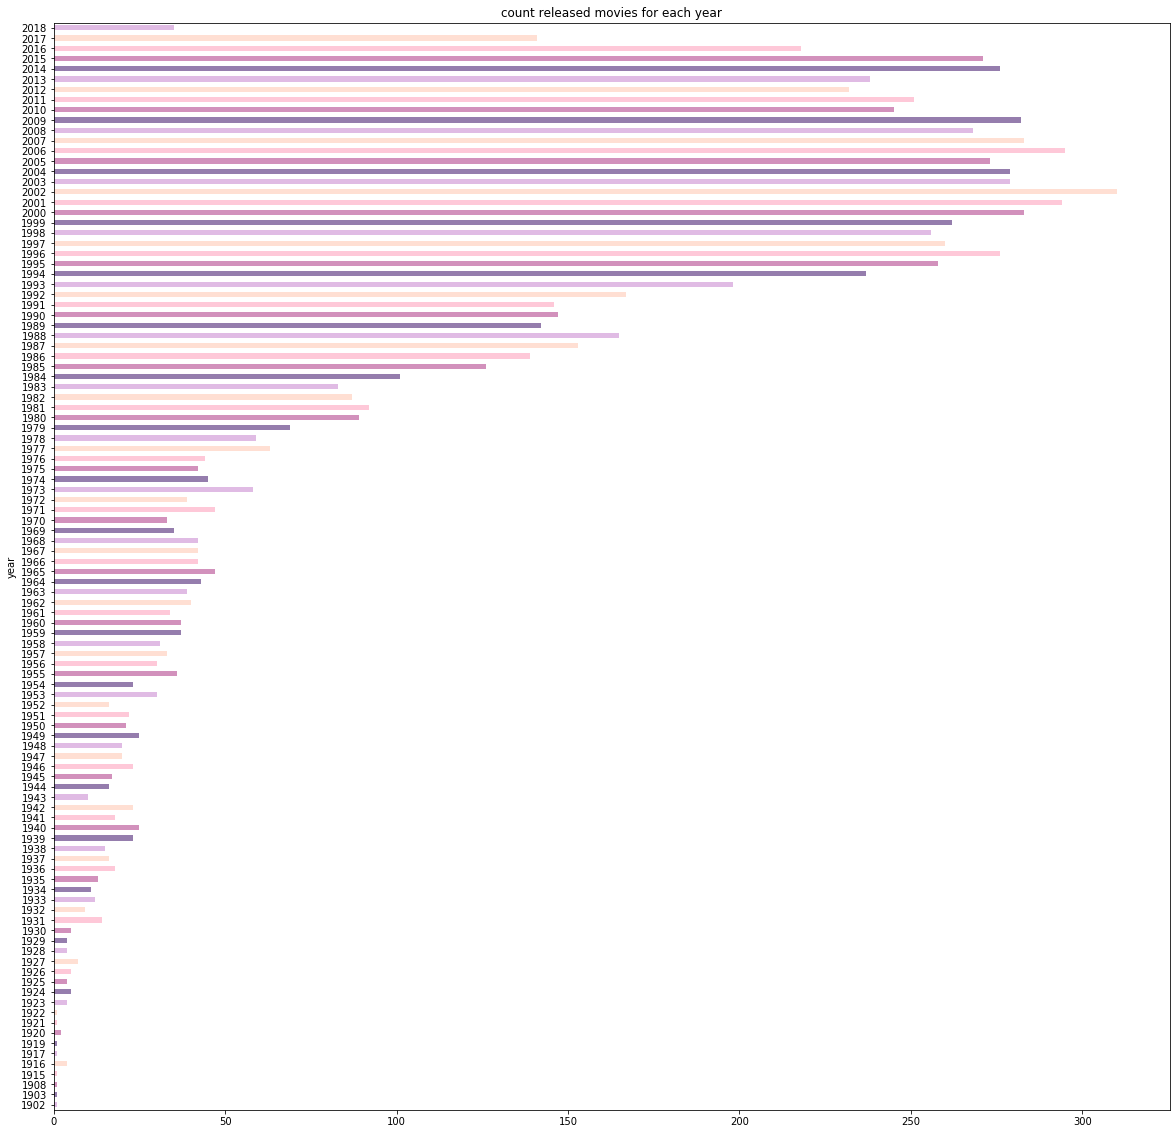

In [13]:
my_colors = list(islice(cycle(['#E0BBE4', '#957DAD', '#D291BC', '#FEC8D8', '#FFDFD3']), None, len(data_movies)))
# data_movies['year'].value_counts().plot(kind='barh',figsize=(30,30),color=my_colors)
data_movies.groupby('year')["year"].count().plot(kind='barh',figsize=(20,20),color=my_colors,title = 'count released movies for each year')

    - กราฟที่ 2: แสดงกราฟค่า จำนวนการให้ rating ในแต่ละปี

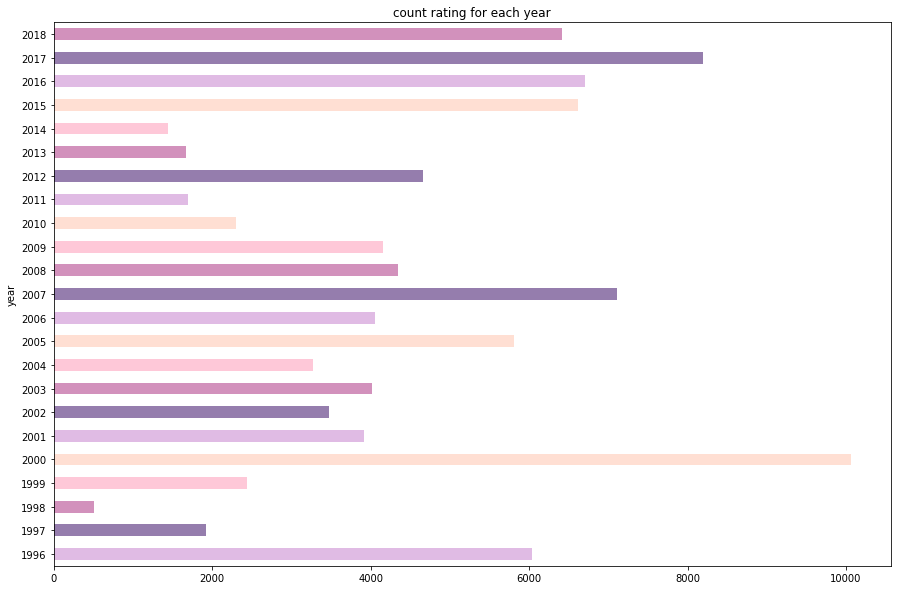

In [14]:
data_rating.groupby('year')["year"].count().plot(kind='barh',figsize=(15,10),color=my_colors,title = 'count rating for each year')

    - กราฟที่ 3: แสดงกราฟค่า จำนวน movies ในแต่ละ genre

C:\Users\beamconan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


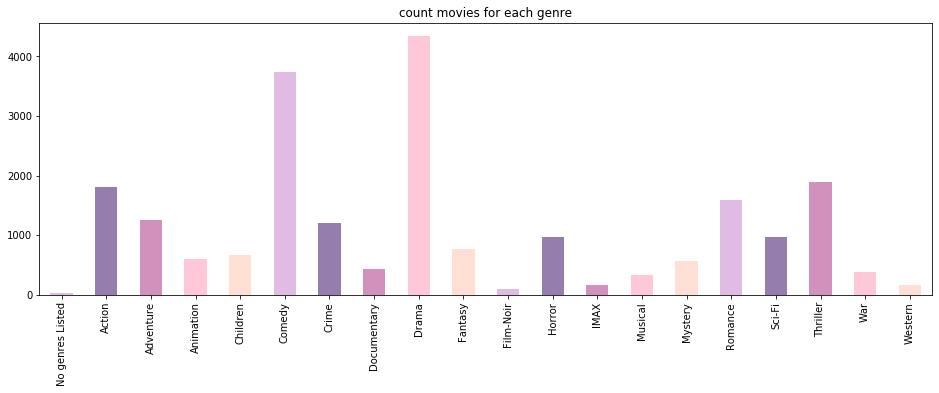

In [15]:
data_movies.sum(axis='rows').iloc[4:].plot(kind='bar',figsize=(16,5),colors=my_colors,title = 'count movies for each genre')

    - กราฟที่ 4: แสดงกราฟ (y-axis: stacked graph) ค่าจำนวน movie แต่ละ genre ในแต่ละปี (x-axis)

In [16]:
_data = pd.DataFrame(data_movies.groupby('year').sum().astype(np.int64),columns=data_movies.columns[4:])
_data

,No genres Listed,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,,,
1902,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1903,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1908,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1915,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1916,0,1,0,0,0,1,2,0,1,0,0,0,0,0,2,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,1,63,41,26,18,110,32,15,109,18,0,28,11,5,13,28,35,51,9,4
2015,6,59,44,34,20,116,26,17,82,26,1,31,0,0,18,17,45,44,4,3
2016,5,48,26,36,17,77,17,13,70,23,0,19,0,0,8,19,26,38,3,4


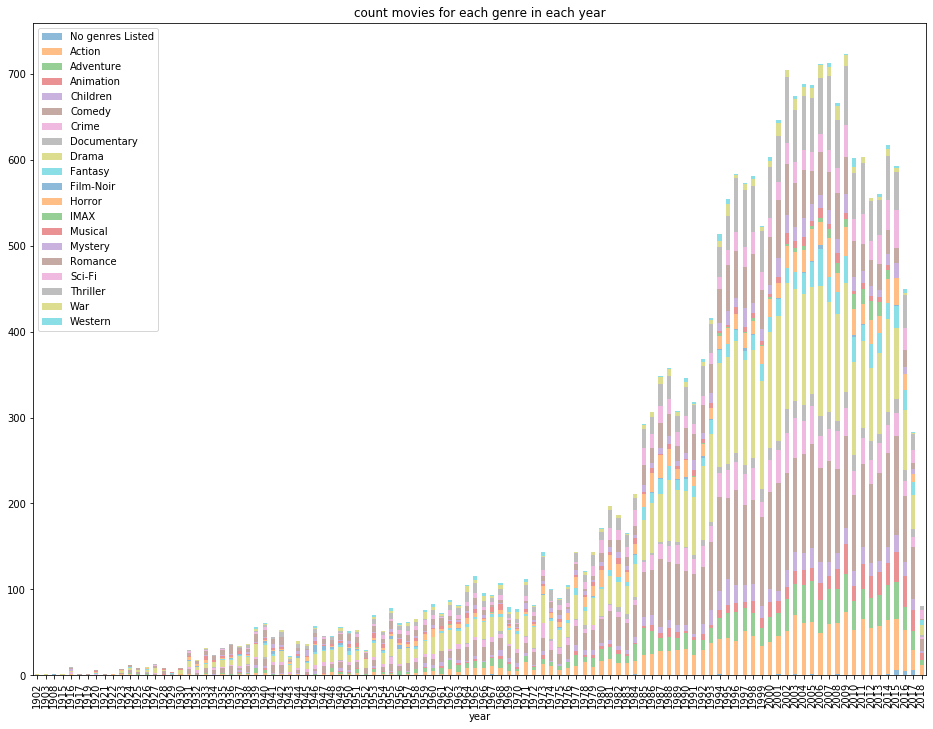

In [17]:
_data.plot(kind='bar',stacked = True,alpha = 0.5,figsize=(16,12),title = 'count movies for each genre in each year')

    - กราฟที่ 5: แสดงกราฟ Histogram ของการกระจายของค่าเฉลี่ย movie rating ใน dataset โดยค่าเฉลี่ย movie rating คำนวณจาก ค่า rating เฉลี่ยของแต่ละ movie เพื่อเป็นข้อมูล input ให้กับ histogram (โดยให้กำหนดจำนวน histogram bins ที่จะเห็นรายละเอียด)

In [18]:
_data = pd.DataFrame(data_rating.groupby('movieId').mean(),columns=['rating'])
_data = _data.reset_index()

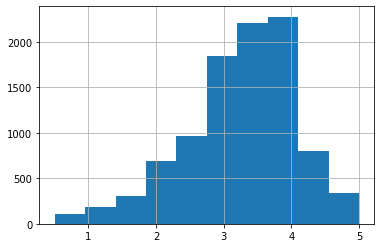

In [19]:
_data['rating'].hist(bins=10)

# ตอนที่ 2: การทดลองสร้างระบบแนะนำสินค้า (Recommendation system) จากข้อมูล user_matrix

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
from numpy.random import RandomState

2.1 สร้างข้อมูลความชอบของผู้ใช้แต่ละคน (user_ matrix)

In [21]:
user_matrix = data_rating.groupby(['userId','movieId']).rating.mean().unstack(1)
user_matrix = user_matrix.fillna(0).astype(np.int64)
user_matrix = user_matrix.sort_values(by=['userId'])
user_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4,0,4,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
608,2,2,2,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


2.2 คำนวณความคล้ายกันของความชอบดูหนังของคู่ ‘userId’ ใดๆ

    2.2.1 สุ่มหยิบข้อมูล user_matrix มาจำนวน nUser ไม่น้อยกว่า 20 คน

In [22]:
user_sample = user_matrix.sample(20,random_state=42)
user_sample

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
82,2,3,0,0,0,3,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
219,3,2,0,0,0,3,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
599,3,2,1,0,0,4,2,0,1,3,...,0,0,0,0,0,0,0,0,0,0
265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
483,4,4,0,0,2,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
322,3,3,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


    2.2.2 คำนวณความคล้ายของความชอบ movie ของคู่ user โดยใช้ตัววัด cosine_similarity() สำหรับข้อมูล user_matrix ที่สุ่มขึ้นมา

In [23]:
df_cosine_sim = pd.DataFrame(cosine_similarity(user_sample))
df_cosine_sim.index = df_cosine_sim.index.map({i:user_sample.index.values[i] for i in range(0,20)} )
df_cosine_sim = df_cosine_sim.rename(columns=({i:user_sample.index.values[i] for i in range(0,20)}))
df_cosine_sim

,82,219,56,599,265,156,483,322,581,292,239,251,197,395,291,321,547,525,11,3
82,1.000000,0.308961,0.216214,0.214727,0.141838,0.107790,0.273598,0.134803,0.082743,0.263581,0.301641,0.088082,0.117412,0.189303,0.040773,0.177638,0.000000,0.162670,0.218538,0.021438
219,0.308961,1.000000,0.189210,0.387860,0.167302,0.215818,0.418273,0.272761,0.192161,0.327480,0.503718,0.145215,0.151646,0.141446,0.095091,0.172316,0.052313,0.349671,0.180967,0.002909
56,0.216214,0.189210,1.000000,0.139133,0.133968,0.101648,0.147961,0.143029,0.058961,0.162596,0.208840,0.187668,0.164356,0.387804,0.000000,0.529379,0.000000,0.100967,0.337609,0.000000
599,0.214727,0.387860,0.139133,1.000000,0.213651,0.278983,0.365685,0.212996,0.134575,0.271613,0.333110,0.122916,0.128722,0.129518,0.086209,0.140937,0.056035,0.304674,0.146196,0.032142
265,0.141838,0.167302,0.133968,0.213651,1.000000,0.161296,0.158577,0.139964,0.030526,0.171612,0.214003,0.156424,0.185916,0.077706,0.000000,0.113525,0.034737,0.107175,0.186009,0.019976
156,0.107790,0.215818,0.101648,0.278983,0.161296,1.000000,0.185221,0.263853,0.052659,0.147667,0.200562,0.133339,0.154456,0.066127,0.008907,0.092634,0.146743,0.188259,0.108167,0.000000
483,0.273598,0.418273,0.147961,0.365685,0.158577,0.185221,1.000000,0.253348,0.240592,0.316224,0.389841,0.143495,0.142572,0.170246,0.164763,0.150083,0.030651,0.416025,0.129071,0.003274
322,0.134803,0.272761,0.143029,0.212996,0.139964,0.263853,0.253348,1.000000,0.201129,0.170310,0.300704,0.173189,0.202765,0.119464,0.042948,0.118903,0.066755,0.243078,0.139090,0.000000
581,0.082743,0.192161,0.058961,0.134575,0.030526,0.052659,0.240592,0.201129,1.000000,0.188563,0.216245,0.207168,0.076914,0.034521,0.233354,0.028446,0.000000,0.224150,0.069569,0.000000
292,0.263581,0.327480,0.162596,0.271613,0.171612,0.147667,0.316224,0.170310,0.188563,1.000000,0.354579,0.105615,0.135996,0.135079,0.190603,0.157953,0.011110,0.293803,0.181017,0.000000


    2.2.3 คำนวณความคล้ายของความชอบ movie ของคู่ user โดยใช้ตัววัด Pearson’s similarity()

In [24]:
user_sample.T.corr(method='pearson')

userId,82,219,56,599,265,156,483,322,581,292,239,251,197,395,291,321,547,525,11,3
userId,,,,,,,,,,,,,,,,,,,,
82,1.000000,0.286762,0.208988,0.166144,0.125740,0.081288,0.246041,0.121982,0.074310,0.240953,0.284184,0.081948,0.110246,0.180501,0.033011,0.168937,-0.006782,0.134779,0.209839,0.015211
219,0.286762,1.000000,0.179200,0.331460,0.144744,0.181010,0.383545,0.258498,0.183085,0.296101,0.485924,0.138196,0.142707,0.128255,0.085239,0.160383,0.043549,0.316874,0.168378,-0.006676
56,0.208988,0.179200,1.000000,0.121897,0.126809,0.090361,0.135261,0.137276,0.054900,0.152301,0.200879,0.185046,0.161079,0.384637,-0.003753,0.527007,-0.003074,0.088411,0.334082,-0.002940
599,0.166144,0.331460,0.121897,1.000000,0.176858,0.215656,0.284124,0.189081,0.118858,0.202336,0.293331,0.113761,0.115208,0.106238,0.068257,0.120267,0.039300,0.232899,0.124010,0.013207
265,0.125740,0.144744,0.126809,0.176858,1.000000,0.140657,0.131430,0.129150,0.022817,0.150342,0.197607,0.151768,0.180400,0.068897,-0.006967,0.105334,0.029340,0.082258,0.178117,0.014694
156,0.081288,0.181010,0.090361,0.215656,0.140657,1.000000,0.141448,0.250372,0.041089,0.111973,0.173893,0.126490,0.146188,0.052310,-0.001963,0.079796,0.140736,0.151601,0.094863,-0.008664
483,0.246041,0.383545,0.135261,0.284124,0.131430,0.141448,1.000000,0.236577,0.232515,0.277810,0.364046,0.135752,0.132227,0.156087,0.155949,0.135640,0.019463,0.380462,0.112685,-0.008399
322,0.121982,0.258498,0.137276,0.189081,0.129150,0.250372,0.236577,1.000000,0.196156,0.153838,0.289604,0.169417,0.198305,0.112717,0.037671,0.112330,0.062606,0.227751,0.132291,-0.004355
581,0.074310,0.183085,0.054900,0.118858,0.022817,0.041089,0.232515,0.196156,1.000000,0.179697,0.209028,0.204755,0.073505,0.029806,0.230658,0.023822,-0.002889,0.215866,0.064893,-0.002763


2.3 แสดงตารางรายการดังนี้

    2.3.1 ตาราง user ที่มีความชอบคล้ายกันที่สุด 5 อันดับ (เปรียบเทียบจากการวัดความคล้ายด้วย cosine_similarity() ข้อ 2.2.2 และ Person’s similarity ข้อ 2.2.3 

In [25]:
df_cosine_sim_table = pd.DataFrame(df_cosine_sim.unstack().reset_index()).rename(
    columns={"level_0":"user1","level_1":"user2",0:"cosine similarity"})
_df_cosine_sim_table = df_cosine_sim_table.loc[df_cosine_sim_table['user1']!=df_cosine_sim_table['user2']]
_df_cosine_sim_table = _df_cosine_sim_table.sort_values(
    by=["cosine similarity","user1","user2"],ascending=False)
_df_cosine_sim_table.drop_duplicates(subset='cosine similarity', keep="first",inplace=True)
_df_cosine_sim_table.iloc[:6]

,user1,user2,cosine similarity
302,321,56,0.529379
201,239,219,0.503718
275,395,321,0.474089
121,483,219,0.418273
346,525,483,0.416025
130,483,239,0.389841


In [26]:
df_pearson_sim = pd.DataFrame(np.array(user_sample.T.corr(method='pearson')))
df_pearson_sim.index = df_pearson_sim.index.map({i:user_sample.index.values[i] for i in range(0,20)} )
df_pearson_sim = df_pearson_sim.rename(columns=({i:user_sample.index.values[i] for i in range(0,20)}))
# df_pearson_sim

In [27]:
df_pearson_sim_table = pd.DataFrame(df_pearson_sim.unstack().reset_index()).rename(
    columns={"level_0":"user1","level_1":"user2",0:"Pearson’s similarity"})
_df_pearson_sim_table = df_pearson_sim_table.loc[df_pearson_sim_table['user1']!=df_pearson_sim_table['user2']]
_df_pearson_sim_table = _df_pearson_sim_table.sort_values(
    by=["Pearson’s similarity","user1","user2"],ascending=False)
_df_pearson_sim_table.drop_duplicates(subset='Pearson’s similarity', keep="first",inplace=True)
bar1 = _df_pearson_sim_table.iloc[:5]
bar1

,user1,user2,Pearson’s similarity
302,321,56,0.527007
201,239,219,0.485924
275,395,321,0.471073
262,395,56,0.384637
121,483,219,0.383545


    2.3.2 ตาราง user ที่มีความชอบตรงกันข้ามกันที่สุด 5 อันดับ (จากการวัดความคล้ายด้วย Pearson’s similarity ข้อ 2.2.3)

In [28]:
_df_pearson_sim_invert_table = df_pearson_sim_table.loc[df_pearson_sim_table['user1']!=df_pearson_sim_table['user2']]
_df_pearson_sim_invert_table = _df_pearson_sim_invert_table.sort_values(
    by=["Pearson’s similarity","user1","user2"],ascending=True)
_df_pearson_sim_invert_table.drop_duplicates(subset='Pearson’s similarity', keep="first",inplace=True)
bar2 = _df_pearson_sim_invert_table.iloc[:5]
bar2

,user1,user2,Pearson’s similarity
397,3,525,-0.009830
389,3,292,-0.009101
385,3,156,-0.008664
386,3,483,-0.008399
390,3,239,-0.007276


2.3.3 ตาราง จากผลการวัดความคล้ายกันของแต่ละ user_matrix ให้สร้างรายการของคนที่มีความชอบคล้ายกันที่สุด และรายการคนที่มีความชอบตรงข้ามกันที่สุด โดยแสดงในรูปของกราฟความชอบ

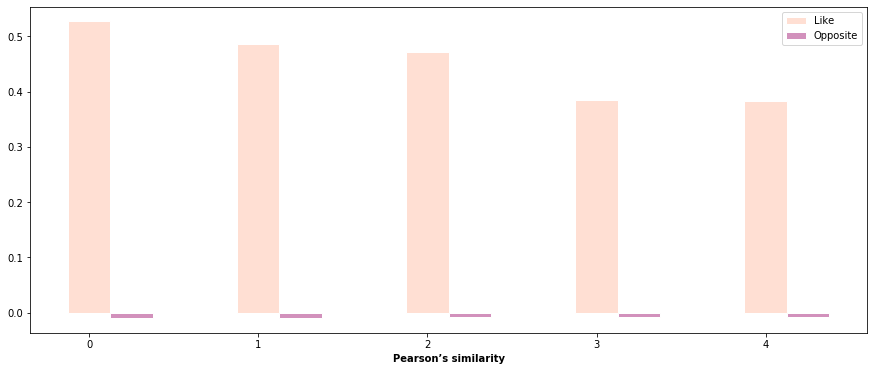

In [29]:
barWidth = 0.25

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]

plt.subplots(figsize=(15,6))
plt.bar(r1,np.array(bar1['Pearson’s similarity']),color="#FFDFD3", width=barWidth, edgecolor='white', label='Like')
plt.bar(r2,np.array(bar2['Pearson’s similarity']),color="#D291BC", width=barWidth, edgecolor='white', label='Opposite')


plt.xlabel('Pearson’s similarity', fontweight='bold')
plt.legend()
plt.show()


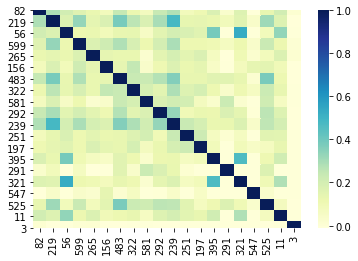

In [30]:
sns.heatmap(df_pearson_sim ,  annot=False, cmap="YlGnBu")

2.4 แสดงรูปภาพ

    2.4.1 กราฟความคล้ายของความชอบ movie ที่วัดด้วย Pearson’s similarity()

In [31]:
from networkx import nx
from matplotlib.lines import Line2D
# Create New Graph
G = nx.Graph()
# Create #node = #user ใน Pearson’s similarity และใส่ label เป็น user_id ในแต่ละ node
for x in df_pearson_sim.index:
    G.add_node( x )
    # Create #edge of graph ตามค่าใน Pearson’s similarity ที่เป็นตามเงื่อนไข 2 เงื่อนไขที่ตั้งไว้ข้างต้น คือแสดงสีเฉพาะ user ที่ชอบคล้ายกันเกิน Th 3 ระดับสี และชอบตรงข้ามกันเกิน Th 3 ระดับสี

Th1 = 0.25
Th2 = 0.1
Th3 = 0
Th4 = -0.003
Th5 = -0.005
# Th6 = 0.004

# Add Edges with weight and assign color to the lines depend on 3 conditions
for x in range( len(df_pearson_sim.index) ):
    for y in range(x+1, len (df_pearson_sim.index) ):
        if df_pearson_sim.iloc[ x, y ] > Th1 :
            G.add_edge( df_pearson_sim.index[x], df_pearson_sim.index[y], 
                       weight = 1+df_pearson_sim.iloc[ x, y ],color="#bb4466",width=500) #red
        elif df_pearson_sim.iloc[ x, y ] > Th2 :
            G.add_edge( df_pearson_sim.index[x], df_pearson_sim.index[y], 
                       weight = 1+df_pearson_sim.iloc[ x, y ],color="#E098AE",width=400) #rouge
        elif df_pearson_sim.iloc[ x, y ] > Th3 :
            G.add_edge( df_pearson_sim.index[x], df_pearson_sim.index[y], 
                       weight = 1+df_pearson_sim.iloc[ x, y ],color="#88dddd",width=300) #arctic
        elif df_pearson_sim.iloc[ x, y ] > Th4 :
            G.add_edge( df_pearson_sim.index[x], df_pearson_sim.index[y], 
                       weight = 0.5+np.abs(df_pearson_sim.iloc[ x, y ]),color="yellow",width=100) #
        elif df_pearson_sim.iloc[ x, y ] > Th5 :
            G.add_edge( df_pearson_sim.index[x], df_pearson_sim.index[y], 
                       weight = 0.5+np.abs(df_pearson_sim.iloc[ x, y ]),color="#f7b57e",width=100) #cantaloupe
        else:
            G.add_edge( df_pearson_sim.index[x], df_pearson_sim.index[y], 
                       weight = 0.5+np.abs(df_pearson_sim.iloc[ x, y ]),color="#FEC8D8",width=200) #blush

C:\Users\beamconan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\beamconan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


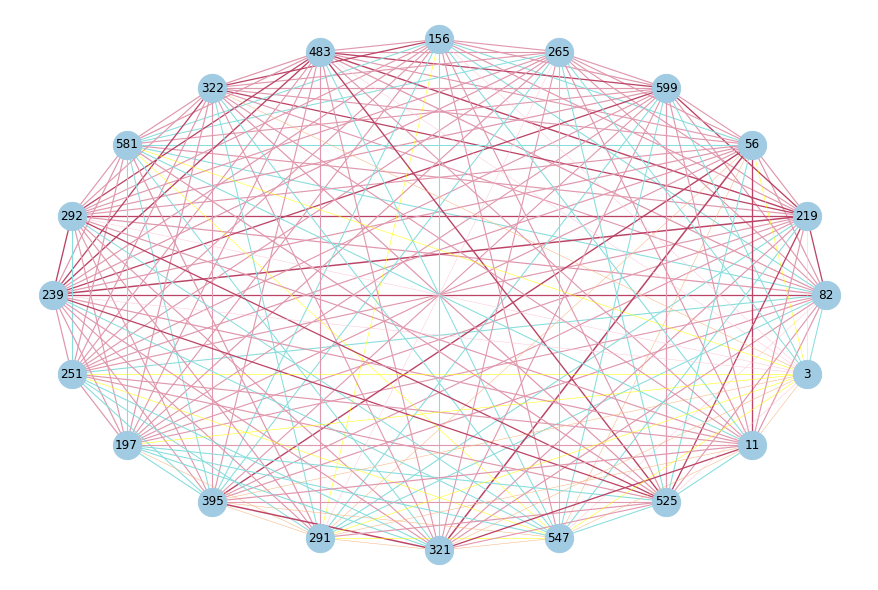

In [33]:
plt.figure(figsize=(12,8))

pos = nx.circular_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos,with_labels = True, edges=edges, edge_color=colors, width=weights,node_color='#A0CBE2',node_size=800)

    2.4.2 แสดงรูปตาราง movie title ที่ rating สูงสุด ที่ควรแนะนำของคนที่มีความชอบคล้ายกันที่สุด ที่ควรแนะนำให้ดู

In [34]:
df_pearson_sim_detail = df_pearson_sim_table.copy()
df_pearson_sim_detail = df_pearson_sim_detail.rename(columns={"user1":"user_id","user2":"user_id sim"})

index_condition_drop = df_pearson_sim_detail[df_pearson_sim_detail['user_id']==df_pearson_sim_detail['user_id sim']].index
df_pearson_sim_detail.drop(index_condition_drop,inplace = True)

idx = df_pearson_sim_detail.groupby(['user_id'])['Pearson’s similarity'].transform(
    max) == df_pearson_sim_detail['Pearson’s similarity']

_df_pearson_sim_detail = df_pearson_sim_detail[idx].copy()

fn = lambda _df_pearson_sim_detail: _df_pearson_sim_detail.loc[
    RandomState(42).choice(_df_pearson_sim_detail.index,size=1,replace = True),:]

df_pearson_sim_detail = _df_pearson_sim_detail.groupby('user_id',as_index=False).apply(fn)
df_pearson_sim_detail = df_pearson_sim_detail.set_index(['user_id'])
df_pearson_sim_detail

,user_id sim,Pearson’s similarity
user_id,,
82,219,0.286762
219,239,0.485924
56,321,0.527007
599,219,0.331460
265,239,0.197607
156,322,0.250372
483,219,0.383545
322,239,0.289604
581,483,0.232515


In [35]:
idx = data_rating.groupby(['userId'])['rating'].transform(max) == data_rating['rating']

_data_rating = data_rating[idx].copy()

fn = lambda _data_rating: _data_rating.loc[RandomState(42).choice(_data_rating.index,size=1,replace = True),:]
max_rating = _data_rating.groupby('userId',as_index=False).apply(fn)
max_rating

,,userId,movieId,rating,timestamp,Date,year
0,192,1,2959,5.0,964983282,2000-07-30 18:54:42,2000
1,254,2,106782,5.0,1445714966,2015-10-24 19:29:26,2015
2,292,3,5919,5.0,1306463825,2011-05-27 02:37:05,2011
3,407,4,1733,5.0,945079143,1999-12-13 09:59:03,1999
4,553,5,590,5.0,847434747,1996-11-08 06:32:27,1996
...,...,...,...,...,...,...,...
605,98254,606,7579,5.0,1171375514,2007-02-13 14:05:14,2007
606,98598,607,2403,5.0,963078960,2000-07-08 17:56:00,2000
607,99055,608,2502,5.0,1117161750,2005-05-27 02:42:30,2005
608,99520,609,590,4.0,847220802,1996-11-05 19:06:42,1996


In [36]:
max_rating = max_rating.set_index('userId')
df_pearson_sim_detail['movieId'] = [max_rating.iloc[uid]['movieId'] for uid in df_pearson_sim_detail.index]
data_movies = data_movies.set_index('movieId')
df_pearson_sim_detail['movie title'] = df_pearson_sim_detail.movieId.apply(
    lambda x: data_movies[data_movies.index == x].title.values[0]) 
df_pearson_sim_detail['rating'] = df_pearson_sim_detail.movieId.apply(
    lambda x: data_rating[data_rating.movieId == x].rating.values[0]) 

df_pearson_sim_detail

,user_id sim,Pearson’s similarity,movieId,movie title,rating
user_id,,,,,
82,219,0.286762,1258,"Shining, The (1980)",3.0
219,239,0.485924,3034,Robin Hood (1973),5.0
56,321,0.527007,2081,"Little Mermaid, The (1989)",3.0
599,219,0.331460,26258,"Topo, El (1970)",4.0
265,239,0.197607,1884,Fear and Loathing in Las Vegas (1998),3.0
156,322,0.250372,2959,Fight Club (1999),5.0
483,219,0.383545,596,Pinocchio (1940),5.0
322,239,0.289604,318,"Shawshank Redemption, The (1994)",3.0
581,483,0.232515,92259,Intouchables (2011),5.0


    2.4.3 แสดงรูปตาราง movie title ที่ rating สูงสุด ของคนที่มีความชอบตรงข้ามกันที่สุด ที่ไม่ควรแนะนำให้ดู

In [37]:
df_pearson_sim_detail = df_pearson_sim_table.copy()
df_pearson_sim_detail = df_pearson_sim_detail.rename(columns={"user1":"user_id","user2":"user_id sim"})

index_condition_drop = df_pearson_sim_detail[df_pearson_sim_detail['user_id']==df_pearson_sim_detail['user_id sim']].index
df_pearson_sim_detail.drop(index_condition_drop,inplace = True)

idx = df_pearson_sim_detail.groupby(['user_id'])['Pearson’s similarity'].transform(
    min) == df_pearson_sim_detail['Pearson’s similarity']

_df_pearson_sim_detail = df_pearson_sim_detail[idx].copy()

fn = lambda _df_pearson_sim_detail: _df_pearson_sim_detail.loc[
    RandomState(42).choice(_df_pearson_sim_detail.index,size=1,replace = True),:]

df_pearson_sim_detail = _df_pearson_sim_detail.groupby('user_id',as_index=False).apply(fn)

index_condition_drop = df_pearson_sim_detail[df_pearson_sim_detail['Pearson’s similarity']>0].index
df_pearson_sim_detail.drop(index_condition_drop,inplace = True)

df_pearson_sim_detail = df_pearson_sim_detail.set_index(['user_id'])
df_pearson_sim_detail

,user_id sim,Pearson’s similarity
user_id,,
82,547,-0.006782
219,3,-0.006676
56,291,-0.003753
265,291,-0.006967
156,3,-0.008664
483,3,-0.008399
322,3,-0.004355
581,547,-0.002889
292,3,-0.009101


In [38]:
df_pearson_sim_detail['movieId'] = [max_rating.iloc[uid]['movieId'] for uid in df_pearson_sim_detail.index]
df_pearson_sim_detail['movie title'] = df_pearson_sim_detail.movieId.apply(
    lambda x: data_movies[data_movies.index == x].title.values[0]) 
df_pearson_sim_detail['rating'] = df_pearson_sim_detail.movieId.apply(
    lambda x: data_rating[data_rating.movieId == x].rating.values[0]) 

df_pearson_sim_detail

,user_id sim,Pearson’s similarity,movieId,movie title,rating
user_id,,,,,
82,547,-0.006782,1258,"Shining, The (1980)",3.0
219,3,-0.006676,3034,Robin Hood (1973),5.0
56,291,-0.003753,2081,"Little Mermaid, The (1989)",3.0
265,291,-0.006967,1884,Fear and Loathing in Las Vegas (1998),3.0
156,3,-0.008664,2959,Fight Club (1999),5.0
483,3,-0.008399,596,Pinocchio (1940),5.0
322,3,-0.004355,318,"Shawshank Redemption, The (1994)",3.0
581,547,-0.002889,92259,Intouchables (2011),5.0
292,3,-0.009101,1682,"Truman Show, The (1998)",3.0
